In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [69]:
df_datos = pd.read_csv("../data/datosProyecto.csv")
df_datos

,ID DEPATAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
0,91,AMAZONAS,91001,LETICIA,91001000,LETICIA (LETICIA - AMAZONAS),2024,6,3994102,1010671.0,7824.51,Jueves,06/20/2024 03:30:00 PM,24.00
1,91,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2024,6,127838,40378.0,256.00,Miércoles,06/05/2024 06:15:00 PM,24.00
2,91,AMAZONAS,91798,TARAPACA (ANM),91798000,TARAPACA (TARAPACA (ANM) - AMAZONAS),2024,6,26578,11917.0,101.43,Jueves,06/20/2024 06:30:00 PM,10.18
3,88,ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,6,1284196,274864.0,2241.56,Miércoles,06/12/2024 02:15:00 PM,24.00
4,13,BOLÍVAR,13001,CARTAGENA DE INDIAS,13001007,ISLA FUERTE (CARTAGENA DE INDIAS - BOLÍVAR),2024,6,60724,28336.0,265.63,Domingo,06/30/2024 08:00:00 PM,9.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4586,97,VAUPÉS,97161,CARURÚ,97161000,CARURÚ (CARURÚ - VAUPÉS),2024,9,35746,8582.0,92.14,martes,09/24/2024 06:30:00 PM,17.22
4587,97,VAUPÉS,97001,MITÚ,97001000,MITÚ (MITÚ - VAUPÉS),2024,9,1632356,385301.0,3355.10,martes,09/24/2024 01:00:00 PM,24.00
4588,97,VAUPÉS,97666,TARAIRA,97666000,TARAIRA (TARAIRA - VAUPÉS),2024,9,45482,12302.0,138.16,lunes,09/16/2024 12:30:00 PM,14.25
4589,99,VICHADA,99001,PUERTO CARREÑO,99001000,PUERTO CARREÑO (PUERTO CARREÑO - VICHADA),2024,9,2506803,703817.0,5147.12,jueves,09/12/2024 01:45:00 PM,24.00


#Exploracion Básica


In [70]:
# Ver las primeras filas 

primeras_filas=df_datos.head()
primeras_filas

## los datos de las primeras fillas nos indican que 
## | **Columna**                | **Descripción**                                                                                         |
## | -------------------------- | ------------------------------------------------------------------------------------------------------- |
## | `ID DEPARTAMENTO`          | Código numérico del departamento (por ejemplo, 91 = Amazonas).                                          |
## | `DEPARTAMENTO`             | Nombre del departamento.                                                                                |
## | `ID MUNICIPIO`             | Código DANE del municipio.                                                                              |
## | `MUNICIPIO`                | Nombre del municipio.                                                                                   |
## | `ID LOCALIDAD`             | Código único para cada localidad (combinación de municipio y localidad).                                |
## | `LOCALIDAD`                | Nombre de la localidad con contexto (ej. "LETICIA (LETICIA - AMAZONAS)").                               |
## | `AÑO SERVICIO`             | Año del registro del consumo de energía.                                                                |
## | `MES SERVICIO`             | Mes del registro del consumo de energía.                                                                |
## | `ENERGÍA ACTIVA`           | Cantidad total de energía activa consumida en el mes (en kWh).                                          |
## | `ENERGÍA REACTIVA`         | Cantidad de energía reactiva consumida (en kVARh), relacionada con la eficiencia del sistema eléctrico. |
## | `POTENCIA MÁXIMA`          | Potencia máxima registrada en el mes (en kW).                                                           |
## | `DÍA DE DEMANDA MÁXIMA`    | Día de la semana en que ocurrió el pico de consumo.                                                     |
## | `FECHA DE DEMANDA MÁXIMA`  | Fecha y hora exacta del momento de mayor demanda energética.                                            |
## | `PROMEDIO DIARIO EN HORAS` | Promedio de horas al día en las que hubo servicio de energía eléctrica en esa localidad durante el mes. |


,ID DEPATAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
0,91,AMAZONAS,91001,LETICIA,91001000,LETICIA (LETICIA - AMAZONAS),2024,6,3994102,1010671.0,7824.51,Jueves,06/20/2024 03:30:00 PM,24.00
1,91,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2024,6,127838,40378.0,256.00,Miércoles,06/05/2024 06:15:00 PM,24.00
2,91,AMAZONAS,91798,TARAPACA (ANM),91798000,TARAPACA (TARAPACA (ANM) - AMAZONAS),2024,6,26578,11917.0,101.43,Jueves,06/20/2024 06:30:00 PM,10.18
3,88,ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,6,1284196,274864.0,2241.56,Miércoles,06/12/2024 02:15:00 PM,24.00
4,13,BOLÍVAR,13001,CARTAGENA DE INDIAS,13001007,ISLA FUERTE (CARTAGENA DE INDIAS - BOLÍVAR),2024,6,60724,28336.0,265.63,Domingo,06/30/2024 08:00:00 PM,9.40


In [71]:
# Tamaño del dataset
 
tamaño_dataset=df_datos.shape
tamaño_dataset

# en este caso el numero de filas que tiene nuestro archivo es 4591 y columnnas 14 

(4591, 14)

In [72]:
# Nombre de Columnas 

nombres_columnas=df_datos.columns
nombres_columnas

# como observamos nuestros datos estan catalogados de la siguiente manera y se observa un error en el apartado de departamento 

Index(['ID DEPATAMENTO', 'DEPARTAMENTO', 'ID MUNICIPIO', 'MUNICIPIO',
       'ID LOCALIDAD', 'LOCALIDAD', 'AÑO SERVICIO', 'MES SERVICIO',
       'ENERGÍA ACTIVA', 'ENERGÍA REACTIVA', 'POTENCIA MÁXIMA',
       'DÍA DE DEMANDA MÁXIMA', 'FECHA DE DEMANDA MÁXIMA',
       'PROMEDIO DIARIO EN HORAS'],
      dtype='object')

In [73]:
# Correcion apartado ID DEPARTAMENTO ( RENOMBRAR)

df_datos.rename(columns={'ID DEPATAMENTO':'ID DEPARTAMENTO'}, inplace=True)

In [74]:
 # Tipo de cada Columna 

tipo_cd_columna=df_datos.dtypes
tipo_cd_columna

ID DEPARTAMENTO               int64
DEPARTAMENTO                 object
ID MUNICIPIO                  int64
MUNICIPIO                    object
ID LOCALIDAD                  int64
LOCALIDAD                    object
AÑO SERVICIO                  int64
MES SERVICIO                  int64
ENERGÍA ACTIVA                int64
ENERGÍA REACTIVA            float64
POTENCIA MÁXIMA             float64
DÍA DE DEMANDA MÁXIMA        object
FECHA DE DEMANDA MÁXIMA      object
PROMEDIO DIARIO EN HORAS    float64
dtype: object

In [75]:
# Resumen Estadistico 

resumen_estadistico=df_datos.describe()
resumen_estadistico

,ID DEPARTAMENTO,ID MUNICIPIO,ID LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,PROMEDIO DIARIO EN HORAS
count,4591.000000,4591.000000,4.591000e+03,4591.000000,4591.000000,4.591000e+03,4.591000e+03,4591.000000,4591.000000
mean,44.947288,45341.840775,4.534189e+07,2021.963842,6.477020,3.692386e+05,1.085336e+05,715.421464,12.065265
std,28.547393,28505.810987,2.850581e+07,1.410511,3.495385,1.812247e+06,4.896188e+05,3140.805719,10.467295
min,0.000000,5873.000000,5.873000e+06,2020.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,27.000000,27001.000000,2.700103e+07,2021.000000,3.000000,4.950500e+03,1.984000e+03,31.555000,6.280000
50%,27.000000,27615.000000,2.761591e+07,2022.000000,7.000000,1.229200e+04,4.962000e+03,64.800000,8.590000
75%,52.000000,52835.000000,5.283515e+07,2023.000000,9.000000,8.346300e+04,2.987500e+04,218.940000,19.145000
max,99.000000,99773.000000,9.977300e+07,2024.000000,12.000000,2.062092e+07,5.435213e+06,34290.650000,508.000000


In [76]:
# ANALISIS DE LOS DATOS ARROJADOS 

# METRICA	     SIGNIFICADO

# count	         Cantidad de datos no nulos
# mean	         Promedio
# std        	 Desviación estándar (variabilidad de los datos)
# min	         Valor mínimo
# 25%	         Primer cuartil (percentil 25)
# 50%	         Mediana (percentil 50)
# 75%	         Tercer cuartil (percentil 75)
# max	         Valor máximo

In [77]:
# Valores Unicos por columna 

valores_unicos_columna=df_datos.nunique()
valores_unicos_columna

ID DEPARTAMENTO               19
DEPARTAMENTO                  26
ID MUNICIPIO                  53
MUNICIPIO                     95
ID LOCALIDAD                 153
LOCALIDAD                    327
AÑO SERVICIO                   5
MES SERVICIO                  12
ENERGÍA ACTIVA              4272
ENERGÍA REACTIVA            3990
POTENCIA MÁXIMA             3370
DÍA DE DEMANDA MÁXIMA         16
FECHA DE DEMANDA MÁXIMA     4154
PROMEDIO DIARIO EN HORAS    1288
dtype: int64

In [78]:
#Clasificacion de las variables 

categoricas=df_datos.select_dtypes(include='object').columns
numericas=df_datos.select_dtypes(include=['int64','float64']).columns

print("Variables categóricas:", list(categoricas))
print("Variables numéricas:", list(numericas))

Variables categóricas: ['DEPARTAMENTO', 'MUNICIPIO', 'LOCALIDAD', 'DÍA DE DEMANDA MÁXIMA', 'FECHA DE DEMANDA MÁXIMA']
Variables numéricas: ['ID DEPARTAMENTO', 'ID MUNICIPIO', 'ID LOCALIDAD', 'AÑO SERVICIO', 'MES SERVICIO', 'ENERGÍA ACTIVA', 'ENERGÍA REACTIVA', 'POTENCIA MÁXIMA', 'PROMEDIO DIARIO EN HORAS']


In [79]:
# Limpiar espacios antes y después de los nombres de columnas
df_datos.columns = df_datos.columns.str.strip()

In [80]:
# Resumen Estadistico de las variables numericas 

estadistico_numerico=df_datos[numericas].describe()
estadistico_numerico

,ID DEPARTAMENTO,ID MUNICIPIO,ID LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,PROMEDIO DIARIO EN HORAS
count,4591.000000,4591.000000,4.591000e+03,4591.000000,4591.000000,4.591000e+03,4.591000e+03,4591.000000,4591.000000
mean,44.947288,45341.840775,4.534189e+07,2021.963842,6.477020,3.692386e+05,1.085336e+05,715.421464,12.065265
std,28.547393,28505.810987,2.850581e+07,1.410511,3.495385,1.812247e+06,4.896188e+05,3140.805719,10.467295
min,0.000000,5873.000000,5.873000e+06,2020.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,27.000000,27001.000000,2.700103e+07,2021.000000,3.000000,4.950500e+03,1.984000e+03,31.555000,6.280000
50%,27.000000,27615.000000,2.761591e+07,2022.000000,7.000000,1.229200e+04,4.962000e+03,64.800000,8.590000
75%,52.000000,52835.000000,5.283515e+07,2023.000000,9.000000,8.346300e+04,2.987500e+04,218.940000,19.145000
max,99.000000,99773.000000,9.977300e+07,2024.000000,12.000000,2.062092e+07,5.435213e+06,34290.650000,508.000000


In [81]:
# Frecuencia de Categorias

for col in categoricas:
     print(f"\nFrecuencia en {col}:\n", df_datos[col].value_counts())


Frecuencia en DEPARTAMENTO:
 DEPARTAMENTO
CHOCÓ                                                       1243
NARIÑO                                                       859
CAUCA                                                        676
CAQUETÁ                                                      212
VICHADA                                                      209
VAUPÉS                                                       168
VALLE DEL CAUCA                                              164
AMAZONAS                                                     161
BOLÍVAR                                                      148
GUAINÍA                                                      112
CHOCO                                                        102
ANTIOQUIA                                                     95
PUTUMAYO                                                      89
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA      65
MAGDALENA                                      

In [82]:
# Datos maximos y minimos

max_EA = df_datos["ENERGÍA ACTIVA"].max()
min_EA = df_datos["ENERGÍA ACTIVA"].min()
print("Dato Maximo de Energía Activa:", max_EA)
print("Dato Minimo de Energía Activa:", min_EA)
print("")
max_ER = df_datos["ENERGÍA REACTIVA"].max()
min_ER = df_datos["ENERGÍA REACTIVA"].min()
print("Dato Maximo de Energía Reactiva:", max_ER)
print("Dato Minimo de Energía Reactiva:", min_ER)
print("")
min_PM = df_datos["POTENCIA MÁXIMA"].min()
max_PM = df_datos["POTENCIA MÁXIMA"].max()
print("Dato Maximo de Potencia Maxima:", max_PM)
print("Dato Minimo de Potencia Maxima:", min_PM)
print("")
min_PH = df_datos["PROMEDIO DIARIO EN HORAS"].min()
max_PH = df_datos["PROMEDIO DIARIO EN HORAS"].max()
print("Dato Maximo de Promedio Diario En Horas:", max_PH)
print("Dato Minimo de Promedio Diario En Horas:", min_PH)

Dato Maximo de Energía Activa: 20620916
Dato Minimo de Energía Activa: 0

Dato Maximo de Energía Reactiva: 5435213.0
Dato Minimo de Energía Reactiva: 0.0

Dato Maximo de Potencia Maxima: 34290.65
Dato Minimo de Potencia Maxima: 0.0

Dato Maximo de Promedio Diario En Horas: 508.0
Dato Minimo de Promedio Diario En Horas: 0.0


In [83]:
#Valores Nulos 

valores_nulos=df_datos.isnull().sum()
valores_nulos

ID DEPARTAMENTO             0
DEPARTAMENTO                0
ID MUNICIPIO                0
MUNICIPIO                   0
ID LOCALIDAD                0
LOCALIDAD                   0
AÑO SERVICIO                0
MES SERVICIO                0
ENERGÍA ACTIVA              0
ENERGÍA REACTIVA            0
POTENCIA MÁXIMA             0
DÍA DE DEMANDA MÁXIMA       1
FECHA DE DEMANDA MÁXIMA     0
PROMEDIO DIARIO EN HORAS    0
dtype: int64

In [84]:
# Datos nulos

print("1.",  df_datos ["ID DEPARTAMENTO"].isnull().values.any())
print("2.",  df_datos ["DEPARTAMENTO"].isnull().values.any())
print("3.",  df_datos ["ID LOCALIDAD"].isnull().values.any())
print("4.",  df_datos ["LOCALIDAD"].isnull().values.any())
print("5.",  df_datos ["AÑO SERVICIO"].isnull().values.any())
print("6.",  df_datos ["MES SERVICIO"].isnull().values.any())
print("7.",  df_datos ["ENERGÍA ACTIVA"].isnull().values.any())
print("8.",  df_datos ["ENERGÍA REACTIVA"].isnull().values.any())
print("9.",  df_datos ["POTENCIA MÁXIMA"].isnull().values.any())
print("10.", df_datos ["DÍA DE DEMANDA MÁXIMA"].isnull().values.any()) # Solo acá hay valores nulos
print("11.", df_datos ["FECHA DE DEMANDA MÁXIMA"].isnull().values.any())
print("12.", df_datos ["PROMEDIO DIARIO EN HORAS"].isnull().values.any())
print("13.", df_datos ["ID MUNICIPIO"].isnull().values.any())
print("14.", df_datos ["MUNICIPIO"].isnull().values.any()) 

1. False
2. False
3. False
4. False
5. False
6. False
7. False
8. False
9. False
10. True
11. False
12. False
13. False
14. False


In [85]:
# Cuantos valores nulos hay

df_datos["DÍA DE DEMANDA MÁXIMA"].isnull().sum() # Solo hay 1 valor nulo
df_datos[df_datos["DÍA DE DEMANDA MÁXIMA"].isna()] # Fila donde está el valor nulo
# Nota: la fecha de demanda maxima dice 07/20/2024, creo yo que ese debe ser el día que debería estar en el dato nulo.
# Solo sería buscar que día fue y llenarlo en el data frame
# Nota 2: El 20 de julio de 2024 fue un sábado.

,ID DEPARTAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
114,27,CHOCÓ,27099,BOJAYÁ,27099002,LA LOMA DE BOJAYÁ (BOJAYÁ (BELLAVISTA) - CHOCÓ),2024,7,9539,3531.0,51.2,NaN,07/20/2024 07:30:00 PM,8.1


In [86]:
# Comprobación que solo hay un dato vacio en el dataframe
df_datos.isnull().sum().sum()

np.int64(1)

# CORRECIÓN DE DATOS 



In [87]:
df_datos = pd.read_csv("../data/datosProyecto.csv")


In [88]:
import pandas as pd
import unicodedata
import re

# Función para quitar tildes
def quitar_tildes(texto):
    if pd.isnull(texto):
        return texto
    texto = str(texto)
    # Normalizar a forma NFD (Canonical Decomposition Form) y filtrar caracteres no ASCII (diacríticos)
    nfkd_form = unicodedata.normalize('NFD', texto)
    return "".join([c for c in nfkd_form if not unicodedata.combining(c)])

# Función para preparar el texto para búsqueda en diccionarios (más robusta)
def preparar_clave_busqueda(texto):
    if pd.isnull(texto):
        return ""  # Retorna cadena vacía para NaN para evitar errores
    texto = str(texto)
    texto = texto.strip()  # Quitar espacios al inicio y al final
    texto = texto.lower()  # Convertir a minúsculas
    texto = quitar_tildes(texto)  # Quitar tildes
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar puntuación (deja letras, números y espacios)
    texto = re.sub(r'\s+', ' ', texto).strip()  # Reemplazar múltiples espacios por uno solo y strip final
    return texto

# Normalizar las claves de los diccionarios para que coincidan con el formato de búsqueda
def normalizar_claves_diccionario(dic):
    return {preparar_clave_busqueda(k): v for k, v in dic.items()}

# --- Diccionarios de Correcciones ----
# Los VALORES deben ser la forma final deseada.
# Las CLAVES pueden ser formas comunes o simplificadas, preparar_clave_busqueda las normalizará.

correcciones_departamento = {
    'choco': 'Chocó',
    'narino': 'Nariño',
    'caqueta': 'Caquetá',
    'guainia': 'Guainía',
    'vaupes': 'Vaupés',
    'bolivar': 'Bolívar',
    'archipielago de san andres': 'Archipiélago de San Andrés, Providencia y Santa Catalina',
    'archipielago de san andres y providencia': 'Archipiélago de San Andrés, Providencia y Santa Catalina',
    'archipielago de san andres providencia y santa catalina': 'Archipiélago de San Andrés, Providencia y Santa Catalina',
    'san andres y providencia': 'Archipiélago de San Andrés, Providencia y Santa Catalina',
    'san andres': 'Archipiélago de San Andrés, Providencia y Santa Catalina',
    'valle del cauca': 'Valle del Cauca',
}

correcciones_municipio = {
    'timbiqui': 'Timbiquí',
    'lopez de micay': 'López de Micay',
    'cienaga': 'Ciénaga',
    'inirida': 'Inírida',
    'mitu': 'Mitú',
    'san andres de tumaco': 'San Andrés de Tumaco',
    'tumaco': 'Tumaco',
    'alto baudo pie de pato': 'Alto Baudó (Pie de Pato)',
    'medio atrato bete': 'Medio Atrato (Beté)',
    'vigia del fuerte': 'Vigía del Fuerte',
    'bajo baudo pizarro': 'Bajo Baudó (Pizarro)',
    'quibdo': 'Quibdó',
    'san vicente del caguan': 'San Vicente del Caguán', 
    'nuqui': 'Nuquí', 
    'santa barbara iscuande': 'Santa Bárbara (Iscuandé)'
}

correcciones_localidad = {
    'puerto carreno puerto carreno vichada': 'Puerto Carreño (Puerto Carreño - Vichada)',
    'palmor cienaga magdalena': 'Palmor (Ciénaga - Magdalena)',
    'mitu mitu vaupes': 'Mitú (Mitú - Vaupés)',
    'leticia leticia amazonas': 'Leticia (Leticia - Amazonas)',
    'panamacito istmina choco': 'Panamacito (Istmina - Chocó)',
    'pogue bojaya choco': 'Pogue (Bojayá - Chocó)',
    'galvez buenaventura valle del cauca': 'Gálvez (Buenaventura - Valle del Cauca)',
    'guacamayas san vicente del caguan caqueta': 'Guacamayas (San Vicente del Caguán - Caquetá)',
    'ciudad mutis bahia solano choco': 'Ciudad Mutis (Bahía Solano - Chocó)',
    'san francisco acandi choco': 'San Francisco (Acandí - Chocó)',
    'cupica bahia solano choco': 'Cupicá (Bahía Solano - Chocó)',
    'el valle bahia solano choco': 'El Valle (Bahía Solano - Chocó)',
    'barranco minas barranco minas guainia': 'Barranco Minas (Barranco Minas - Guainía)', # Corregido Guainía
    'buenavista bajo baudo pizarro choco': 'Buenavista (Bajo Baudó (Pizarro) - Chocó)', # Corregido Chocó
}

correcciones_dia = {
    'sabado': 'Sábado',
    'miercoles': 'Miércoles',
    'lunes': 'Lunes',
    'martes': 'Martes',
    'jueves': 'Jueves',
    'viernes': 'Viernes',
    'domingo': 'Domingo',
}

# Normalizar claves de los diccionarios de correcciones
correcciones_departamento_norm = normalizar_claves_diccionario(correcciones_departamento)
correcciones_municipio_norm = normalizar_claves_diccionario(correcciones_municipio)
correcciones_localidad_norm = normalizar_claves_diccionario(correcciones_localidad)
correcciones_dia_norm = normalizar_claves_diccionario(correcciones_dia)

# Función para aplicar correcciones y formato final
def aplicar_correcciones_y_formato_final(valor_original, correcciones_dic_norm_keys):
    if pd.isnull(valor_original):
        return valor_original # Mantener NaN

    valor_str = str(valor_original)
    clave_busqueda = preparar_clave_busqueda(valor_str)

    if clave_busqueda in correcciones_dic_norm_keys:
        return correcciones_dic_norm_keys[clave_busqueda] # Retornar el valor corregido exacto
    else:
        # Fallback: quitar espacios y aplicar formato de título al string original
        return valor_str.strip().title()

# Carga de Datos 
try:
    
    df_datos = pd.read_csv("../data/datosProyecto.csv")

except FileNotFoundError:
    print("Error: El archivo 'datosProyecto.csv' no fue encontrado. Verifica la ruta.")
    df_datos = pd.DataFrame() 
except Exception as e:
    print(f"Error al cargar el archivo CSV: {e}")
    df_datos = pd.DataFrame()

if not df_datos.empty:
    # Columnas a procesar
    columnas_a_corregir = {
        'DEPARTAMENTO': correcciones_departamento_norm,
        'MUNICIPIO': correcciones_municipio_norm,
        'LOCALIDAD': correcciones_localidad_norm,
        'DÍA DE DEMANDA MÁXIMA': correcciones_dia_norm,
    }

    # Aplicar correcciones
    for col, correcciones_dic in columnas_a_corregir.items():
        if col in df_datos.columns:
            df_datos[col] = df_datos[col].apply(lambda x: aplicar_correcciones_y_formato_final(x, correcciones_dic))
        else:
            print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame.")

    # Convertir la columna de fecha a datetime
    if 'FECHA DE DEMANDA MÁXIMA' in df_datos.columns:
        df_datos['FECHA DE DEMANDA MÁXIMA'] = pd.to_datetime(df_datos['FECHA DE DEMANDA MÁXIMA'], errors='coerce')
    else:
        print("Advertencia: La columna 'FECHA DE DEMANDA MÁXIMA' no se encontró en el DataFrame.")

    # --- Mostrar Frecuencias para Verificar ---
    print("Frecuencias después de la limpieza:\n")

    for col in ['DEPARTAMENTO', 'MUNICIPIO', 'LOCALIDAD', 'DÍA DE DEMANDA MÁXIMA', 'FECHA DE DEMANDA MÁXIMA']:
        if col in df_datos.columns:
            print(f"Frecuencia en {col}:")
            print(df_datos[col].value_counts(dropna=False)) 
            print("-" * 30)
        else:
            print(f"Advertencia: La columna '{col}' no se encontró para mostrar frecuencias.")

    # Ejemplo: Mostrar las primeras filas del DataFrame modificado
    print("\nPrimeras filas del DataFrame procesado:")
    print(df_datos.head())
else:
    print("El DataFrame está vacío. No se realizaron operaciones de limpieza o visualización de frecuencias.")



/tmp/ipykernel_34988/1983165863.py:144: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_datos['FECHA DE DEMANDA MÁXIMA'] = pd.to_datetime(df_datos['FECHA DE DEMANDA MÁXIMA'], errors='coerce')


Frecuencias después de la limpieza:

Frecuencia en DEPARTAMENTO:
DEPARTAMENTO
Chocó                                                       1345
Nariño                                                       859
Cauca                                                        676
Caquetá                                                      215
Vichada                                                      209
Vaupés                                                       170
Valle del Cauca                                              164
Amazonas                                                     161
Bolívar                                                      151
Guainía                                                      114
Archipiélago de San Andrés, Providencia y Santa Catalina      95
Antioquia                                                     95
Putumayo                                                      89
Magdalena                                                     59
Meta        

In [89]:
#Valores Nulos 2

valores_nulos=df_datos.isnull().sum()
valores_nulos




ID DEPATAMENTO              0
DEPARTAMENTO                0
ID MUNICIPIO                0
MUNICIPIO                   0
ID LOCALIDAD                0
LOCALIDAD                   0
AÑO SERVICIO                0
MES SERVICIO                0
ENERGÍA ACTIVA              0
ENERGÍA REACTIVA            0
POTENCIA MÁXIMA             0
DÍA DE DEMANDA MÁXIMA       1
FECHA DE DEMANDA MÁXIMA     0
PROMEDIO DIARIO EN HORAS    0
dtype: int64

In [90]:
# Valor nullo en DÍA DE DEMANDA MÁXIMA
df_datos[df_datos['DÍA DE DEMANDA MÁXIMA'].isnull()]


,ID DEPATAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
114,27,Chocó,27099,Bojayá,27099002,La Loma De Bojayá (Bojayá (Bellavista) - Chocó),2024,7,9539,3531.0,51.2,NaN,2024-07-20 19:30:00,8.1


In [91]:
# eliminando valor nullo 

df_datos = df_datos.dropna(subset=['DÍA DE DEMANDA MÁXIMA'])


In [92]:
#Errores en el df 

errores = df_datos[df_datos['PROMEDIO DIARIO EN HORAS'] > 24][[
    'ID LOCALIDAD', 'DEPARTAMENTO', 'MUNICIPIO', 'LOCALIDAD',
    'AÑO SERVICIO', 'ENERGÍA ACTIVA', 'ENERGÍA REACTIVA',
    'POTENCIA MÁXIMA', 'PROMEDIO DIARIO EN HORAS'
]]
print(errores)

print(f"Total registros con error: {errores.shape[0]}")


      ID LOCALIDAD DEPARTAMENTO  ... POTENCIA MÁXIMA PROMEDIO DIARIO EN HORAS
531       19809007        Cauca  ...           38.54                    38.54
1061       5873002    Antioquia  ...           52.70                   508.00
1276      52427913       Nariño  ...            6.55                    78.00
2858      27099005        Chocó  ...           60.80                    72.40

[4 rows x 9 columns]
Total registros con error: 4


In [93]:
# Correcion apartado ID DEPARTAMENTO ( RENOMBRAR)

df_datos.rename(columns={'ID DEPATAMENTO':'ID DEPARTAMENTO'}, inplace=True)

In [94]:
# Eliminar registros con PROMEDIO DIARIO EN HORAS mayor a 24
df_datos[df_datos['PROMEDIO DIARIO EN HORAS'] <= 24]

,ID DEPARTAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
0,91,Amazonas,91001,Leticia,91001000,Leticia (Leticia - Amazonas),2024,6,3994102,1010671.0,7824.51,Jueves,2024-06-20 15:30:00,24.00
1,91,Amazonas,91540,Puerto Nariño,91540000,Puerto Nariño (Puerto Nariño - Amazonas),2024,6,127838,40378.0,256.00,Miércoles,2024-06-05 18:15:00,24.00
2,91,Amazonas,91798,Tarapaca (Anm),91798000,Tarapaca (Tarapaca (Anm) - Amazonas),2024,6,26578,11917.0,101.43,Jueves,2024-06-20 18:30:00,10.18
3,88,"Archipiélago de San Andrés, Providencia y Sant...",88564,Providencia,88564000,Providencia (Providencia - Archipiélago De San...,2024,6,1284196,274864.0,2241.56,Miércoles,2024-06-12 14:15:00,24.00
4,13,Bolívar,13001,Cartagena De Indias,13001007,Isla Fuerte (Cartagena De Indias - Bolívar),2024,6,60724,28336.0,265.63,Domingo,2024-06-30 20:00:00,9.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4586,97,Vaupés,97161,Carurú,97161000,Carurú (Carurú - Vaupés),2024,9,35746,8582.0,92.14,Martes,2024-09-24 18:30:00,17.22
4587,97,Vaupés,97001,Mitú,97001000,Mitú (Mitú - Vaupés),2024,9,1632356,385301.0,3355.10,Martes,2024-09-24 13:00:00,24.00
4588,97,Vaupés,97666,Taraira,97666000,Taraira (Taraira - Vaupés),2024,9,45482,12302.0,138.16,Lunes,2024-09-16 12:30:00,14.25
4589,99,Vichada,99001,Puerto Carreño,99001000,Puerto Carreño (Puerto Carreño - Vichada),2024,9,2506803,703817.0,5147.12,Jueves,2024-09-12 13:45:00,24.00


In [95]:
#Limitar todos los valores al máximo de 24 horas para no tener errores en el resumen estadistico 

df_datos["PROMEDIO DIARIO EN HORAS"] = df_datos["PROMEDIO DIARIO EN HORAS"].clip(upper=24)

In [96]:
#Eliminar registros donde DÍA DE DEMANDA MÁXIMA esté nulo
df_datos = df_datos.dropna(subset=['DÍA DE DEMANDA MÁXIMA'])

In [97]:
# Verificacion de datos 

# Verificar si quedan valores nulos
print("Valores nulos por columna:\n", df_datos.isnull().sum())

# Verificar los tipos de datos
print("\nTipos de datos:\n", df_datos.dtypes)

# Análisis estadístico limpio
print("\nAnálisis estadístico:\n", df_datos.describe(include='all'))

Valores nulos por columna:
 ID DEPARTAMENTO             0
DEPARTAMENTO                0
ID MUNICIPIO                0
MUNICIPIO                   0
ID LOCALIDAD                0
LOCALIDAD                   0
AÑO SERVICIO                0
MES SERVICIO                0
ENERGÍA ACTIVA              0
ENERGÍA REACTIVA            0
POTENCIA MÁXIMA             0
DÍA DE DEMANDA MÁXIMA       0
FECHA DE DEMANDA MÁXIMA     0
PROMEDIO DIARIO EN HORAS    0
dtype: int64

Tipos de datos:
 ID DEPARTAMENTO                      int64
DEPARTAMENTO                        object
ID MUNICIPIO                         int64
MUNICIPIO                           object
ID LOCALIDAD                         int64
LOCALIDAD                           object
AÑO SERVICIO                         int64
MES SERVICIO                         int64
ENERGÍA ACTIVA                       int64
ENERGÍA REACTIVA                   float64
POTENCIA MÁXIMA                    float64
DÍA DE DEMANDA MÁXIMA               object
FECHA

In [98]:
#Resumen estadistico 2 


df_datos.describe()


,ID DEPARTAMENTO,ID MUNICIPIO,ID LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
count,4590.000000,4590.000000,4.590000e+03,4590.000000,4590.000000,4.590000e+03,4.590000e+03,4590.000000,4590,4590.000000
mean,44.951198,45345.815251,4.534587e+07,2021.963399,6.476906,3.693170e+05,1.085565e+05,715.566174,2022-06-18 09:01:07.071895552,11.935205
min,0.000000,5873.000000,5.873000e+06,2020.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,2020-01-02 19:30:00,0.000000
25%,27.000000,27001.000000,2.700103e+07,2021.000000,3.000000,4.948750e+03,1.983000e+03,31.552500,2021-03-31 01:30:00,6.280000
50%,27.000000,27615.000000,2.761592e+07,2022.000000,7.000000,1.230950e+04,4.966500e+03,64.800000,2022-05-27 18:52:30,8.590000
75%,52.000000,52835.000000,5.283515e+07,2023.000000,9.000000,8.346350e+04,2.989100e+04,218.940000,2023-09-08 19:07:30,19.147500
max,99.000000,99773.000000,9.977300e+07,2024.000000,12.000000,2.062092e+07,5.435213e+06,34290.650000,2024-12-31 21:00:00,24.000000
std,28.549274,28507.644488,2.850764e+07,1.410345,3.495758,1.812437e+06,4.896697e+05,3141.132604,NaN,7.362253


In [99]:
print(df_datos.dtypes)


ID DEPARTAMENTO                      int64
DEPARTAMENTO                        object
ID MUNICIPIO                         int64
MUNICIPIO                           object
ID LOCALIDAD                         int64
LOCALIDAD                           object
AÑO SERVICIO                         int64
MES SERVICIO                         int64
ENERGÍA ACTIVA                       int64
ENERGÍA REACTIVA                   float64
POTENCIA MÁXIMA                    float64
DÍA DE DEMANDA MÁXIMA               object
FECHA DE DEMANDA MÁXIMA     datetime64[ns]
PROMEDIO DIARIO EN HORAS           float64
dtype: object


# Completar el Análisis Exploratorio de Datos (EDA)

In [108]:
import pandas as pd
import unicodedata
import re

# ------------------ Funciones de limpieza ------------------

def quitar_tildes(texto):
    if pd.isnull(texto):
        return texto
    texto = str(texto)
    nfkd_form = unicodedata.normalize('NFD', texto)
    return "".join([c for c in nfkd_form if not unicodedata.combining(c)])

def preparar_clave_busqueda(texto):
    if pd.isnull(texto):
        return ""
    texto = str(texto).strip().lower()
    texto = quitar_tildes(texto)
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

def normalizar_claves_diccionario(dic):
    return {preparar_clave_busqueda(k): v for k, v in dic.items()}

def aplicar_correcciones_y_formato_final(valor_original, correcciones_dic_norm_keys):
    if pd.isnull(valor_original):
        return valor_original
    valor_str = str(valor_original)
    clave_busqueda = preparar_clave_busqueda(valor_str)
    if clave_busqueda in correcciones_dic_norm_keys:
        return correcciones_dic_norm_keys[clave_busqueda]
    else:
        return valor_str.strip().title()

# ------------------ Diccionarios de correcciones ------------------

correcciones_departamento = {
    'choco': 'Chocó',
    'narino': 'Nariño',
    'caqueta': 'Caquetá',
    'guainia': 'Guainía',
    'vaupes': 'Vaupés',
    'bolivar': 'Bolívar',
    'archipielago de san andres': 'Archipiélago de San Andrés, Providencia y Santa Catalina',
    'archipielago de san andres y providencia': 'Archipiélago de San Andrés, Providencia y Santa Catalina',
    'archipielago de san andres providencia y santa catalina': 'Archipiélago de San Andrés, Providencia y Santa Catalina',
    'san andres y providencia': 'Archipiélago de San Andrés, Providencia y Santa Catalina',
    'san andres': 'Archipiélago de San Andrés, Providencia y Santa Catalina',
    'valle del cauca': 'Valle del Cauca',
}

correcciones_municipio = {
    'timbiqui': 'Timbiquí',
    'lopez de micay': 'López de Micay',
    'cienaga': 'Ciénaga',
    'inirida': 'Inírida',
    'mitu': 'Mitú',
    'san andres de tumaco': 'San Andrés de Tumaco',
    'tumaco': 'Tumaco',
    'alto baudo pie de pato': 'Alto Baudó (Pie de Pato)',
    'medio atrato bete': 'Medio Atrato (Beté)',
    'vigia del fuerte': 'Vigía del Fuerte',
    'bajo baudo pizarro': 'Bajo Baudó (Pizarro)',
    'quibdo': 'Quibdó',
    'san vicente del caguan': 'San Vicente del Caguán',
    'nuqui': 'Nuquí',
    'santa barbara iscuande': 'Santa Bárbara (Iscuandé)',
}

correcciones_localidad = {
    'puerto carreno puerto carreno vichada': 'Puerto Carreño (Puerto Carreño - Vichada)',
    'palmor cienaga magdalena': 'Palmor (Ciénaga - Magdalena)',
    'mitu mitu vaupes': 'Mitú (Mitú - Vaupés)',
    'leticia leticia amazonas': 'Leticia (Leticia - Amazonas)',
    'panamacito istmina choco': 'Panamacito (Istmina - Chocó)',
    'pogue bojaya choco': 'Pogue (Bojayá - Chocó)',
    'galvez buenaventura valle del cauca': 'Gálvez (Buenaventura - Valle del Cauca)',
    'guacamayas san vicente del caguan caqueta': 'Guacamayas (San Vicente del Caguán - Caquetá)',
    'ciudad mutis bahia solano choco': 'Ciudad Mutis (Bahía Solano - Chocó)',
    'san francisco acandi choco': 'San Francisco (Acandí - Chocó)',
    'cupica bahia solano choco': 'Cupicá (Bahía Solano - Chocó)',
    'el valle bahia solano choco': 'El Valle (Bahía Solano - Chocó)',
    'barranco minas barranco minas guainia': 'Barranco Minas (Barranco Minas - Guainía)',
    'buenavista bajo baudo pizarro choco': 'Buenavista (Bajo Baudó (Pizarro) - Chocó)',
}

correcciones_dia = {
    'sabado': 'Sábado',
    'miercoles': 'Miércoles',
    'lunes': 'Lunes',
    'martes': 'Martes',
    'jueves': 'Jueves',
    'viernes': 'Viernes',
    'domingo': 'Domingo',
}

# ------------------ Normalización de claves ------------------

correcciones_departamento_norm = normalizar_claves_diccionario(correcciones_departamento)
correcciones_municipio_norm = normalizar_claves_diccionario(correcciones_municipio)
correcciones_localidad_norm = normalizar_claves_diccionario(correcciones_localidad)
correcciones_dia_norm = normalizar_claves_diccionario(correcciones_dia)

# ------------------ Carga del archivo ------------------

try:
    df_datos = pd.read_csv("../data/datosProyecto.csv")
except FileNotFoundError:
    print("Error: El archivo 'datosProyecto.csv' no fue encontrado. Verifica la ruta.")
    df_datos = pd.DataFrame()
except Exception as e:
    print(f"Error al cargar el archivo CSV: {e}")
    df_datos = pd.DataFrame()

# ------------------ Aplicar limpieza si el DataFrame no está vacío ------------------

if not df_datos.empty:

    columnas_a_corregir = {
        'DEPARTAMENTO': correcciones_departamento_norm,
        'MUNICIPIO': correcciones_municipio_norm,
        'LOCALIDAD': correcciones_localidad_norm,
        'DÍA DE DEMANDA MÁXIMA': correcciones_dia_norm,
    }

    for col, correcciones_dic in columnas_a_corregir.items():
        if col in df_datos.columns:
            df_datos[col] = df_datos[col].apply(lambda x: aplicar_correcciones_y_formato_final(x, correcciones_dic))
        else:
            print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame.")

    if 'FECHA DE DEMANDA MÁXIMA' in df_datos.columns:
        df_datos['FECHA DE DEMANDA MÁXIMA'] = pd.to_datetime(df_datos['FECHA DE DEMANDA MÁXIMA'], errors='coerce')
    else:
        print("Advertencia: La columna 'FECHA DE DEMANDA MÁXIMA' no se encontró en el DataFrame.")

    # ------------------ Mostrar frecuencias ------------------

    print("Frecuencias después de la limpieza:\n")

    for col in ['DEPARTAMENTO', 'MUNICIPIO', 'LOCALIDAD', 'DÍA DE DEMANDA MÁXIMA', 'FECHA DE DEMANDA MÁXIMA']:
        if col in df_datos.columns:
            print(f"Frecuencia en {col}:")
            print(df_datos[col].value_counts(dropna=False))
            print("-" * 30)
        else:
            print(f"Advertencia: La columna '{col}' no se encontró para mostrar frecuencias.")

    print("\nPrimeras filas del DataFrame procesado:")
    print(df_datos.head())

    # ------------------ Eliminar registros no válidos ------------------

    df_datos = df_datos.dropna(subset=['DÍA DE DEMANDA MÁXIMA'])  # Eliminar nulos en día
    df_datos = df_datos[df_datos['PROMEDIO DIARIO EN HORAS'] <= 24]  # Filtrar valores válidos

    # ------------------ Renombrar columna mal escrita ------------------

    df_datos.rename(columns={'ID DEPATAMENTO': 'ID DEPARTAMENTO'}, inplace=True)

    # ------------------ Limitar máximo de horas ------------------

    df_datos["PROMEDIO DIARIO EN HORAS"] = df_datos["PROMEDIO DIARIO EN HORAS"].clip(upper=24)

    # ------------------ Verificación final ------------------

    print("Valores nulos por columna:\n", df_datos.isnull().sum())
    print("\nTipos de datos:\n", df_datos.dtypes)
    print("\nAnálisis estadístico:\n", df_datos.describe(include='all'))
    print(df_datos.describe())

else:
    print("El DataFrame está vacío. No se realizaron operaciones de limpieza o visualización de frecuencias.")


/tmp/ipykernel_34988/2881031671.py:134: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_datos['FECHA DE DEMANDA MÁXIMA'] = pd.to_datetime(df_datos['FECHA DE DEMANDA MÁXIMA'], errors='coerce')


Frecuencias después de la limpieza:

Frecuencia en DEPARTAMENTO:
DEPARTAMENTO
Chocó                                                       1345
Nariño                                                       859
Cauca                                                        676
Caquetá                                                      215
Vichada                                                      209
Vaupés                                                       170
Valle del Cauca                                              164
Amazonas                                                     161
Bolívar                                                      151
Guainía                                                      114
Archipiélago de San Andrés, Providencia y Santa Catalina      95
Antioquia                                                     95
Putumayo                                                      89
Magdalena                                                     59
Meta        

# GRAFICOS 


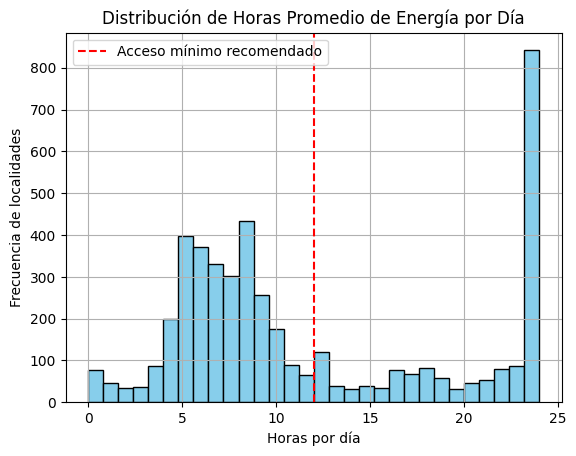

In [101]:
## Histograma del PROMEDIO DIARIO EN HORAS

plt.hist(df_datos['PROMEDIO DIARIO EN HORAS'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(12, color='red', linestyle='--', label='Acceso mínimo recomendado')
plt.title('Distribución de Horas Promedio de Energía por Día')
plt.xlabel('Horas por día')
plt.ylabel('Frecuencia de localidades')
plt.legend()
plt.grid(True)
plt.show()

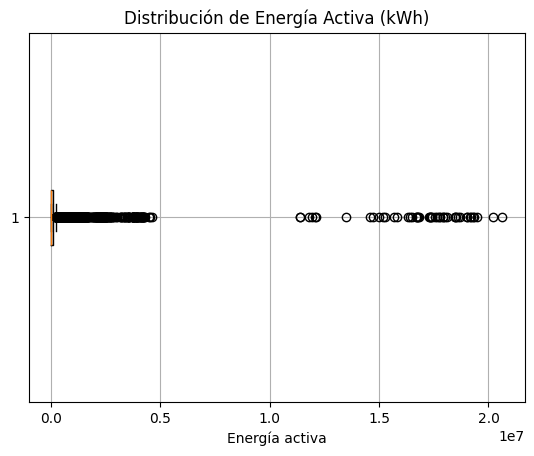

In [102]:
## Boxplot de ENERGÍA ACTIVA o POTENCIA MÁXIMA

plt.boxplot(df_datos['ENERGÍA ACTIVA'], vert=False)
plt.title('Distribución de Energía Activa (kWh)')
plt.xlabel('Energía activa')
plt.grid(True)
plt.show()


 Descripción Estadística:

       ENERGÍA ACTIVA  ...  PROMEDIO DIARIO EN HORAS
count    4.591000e+03  ...               4591.000000
mean     3.692386e+05  ...                 12.065265
std      1.812247e+06  ...                 10.467295
min      0.000000e+00  ...                  0.000000
25%      4.950500e+03  ...                  6.280000
50%      1.229200e+04  ...                  8.590000
75%      8.346300e+04  ...                 19.145000
max      2.062092e+07  ...                508.000000

[8 rows x 4 columns]


/tmp/ipykernel_34988/2559953266.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


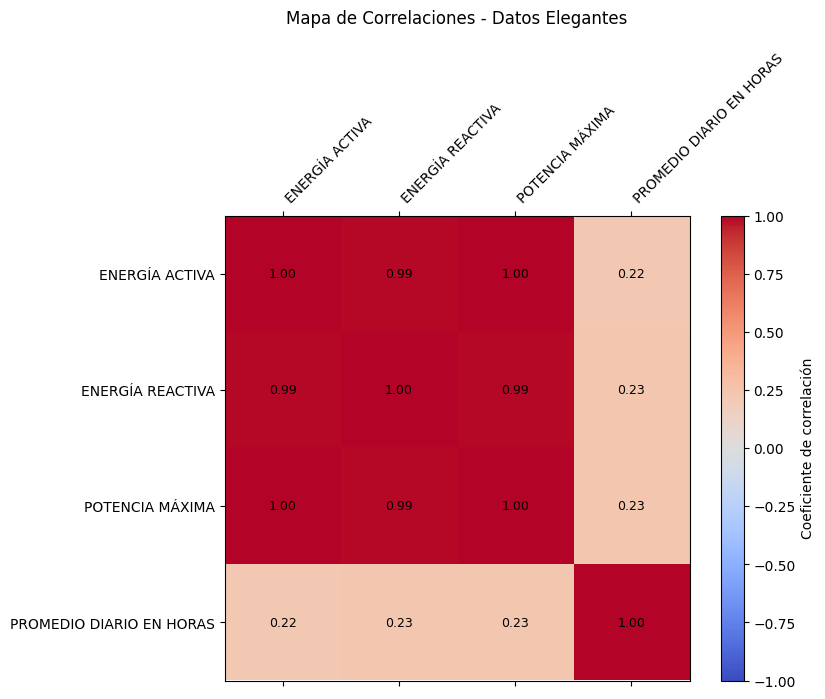

In [127]:
# Mapa de calor (matriz de correlación)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar los datos
df_datos = pd.read_csv("../data/datosProyecto.csv")

# Corregir columna mal escrita si existe
if 'ID DEPATAMENTO' in df_datos.columns:
    df_datos.rename(columns={"ID DEPATAMENTO": "ID DEPARTAMENTO"}, inplace=True)

# Dejar solo las columnas útiles para regresión
df_datos = df_datos[[
    'ENERGÍA ACTIVA',
    'ENERGÍA REACTIVA',
    'POTENCIA MÁXIMA',
    'PROMEDIO DIARIO EN HORAS'
]]

# Descripción estadística para revisión de datos
print(" Descripción Estadística:\n")
print(df_datos.describe())

# Matriz de correlaciones visual
correlacion = df_datos.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
plt.matshow(correlacion, cmap='coolwarm', fignum=1, vmin=-1, vmax=1)

columnas = correlacion.columns
plt.xticks(np.arange(len(columnas)), columnas, rotation=45, ha='left')
plt.yticks(np.arange(len(columnas)), columnas)

# Añadir valores a cada celda
for i in range(len(columnas)):
    for j in range(len(columnas)):
        plt.text(j, i, f"{correlacion.iloc[i, j]:.2f}", 
                 ha='center', va='center', color='black', fontsize=9)

plt.colorbar(label="Coeficiente de correlación")
plt.title("Mapa de Correlaciones - Datos Elegantes", pad=20)
plt.tight_layout()
plt.show()


                          ENERGÍA ACTIVA  ...  PROMEDIO DIARIO EN HORAS
ENERGÍA ACTIVA                  1.000000  ...                  0.215605
ENERGÍA REACTIVA                0.991657  ...                  0.230594
POTENCIA MÁXIMA                 0.997529  ...                  0.226662
PROMEDIO DIARIO EN HORAS        0.215605  ...                  1.000000

[4 rows x 4 columns]


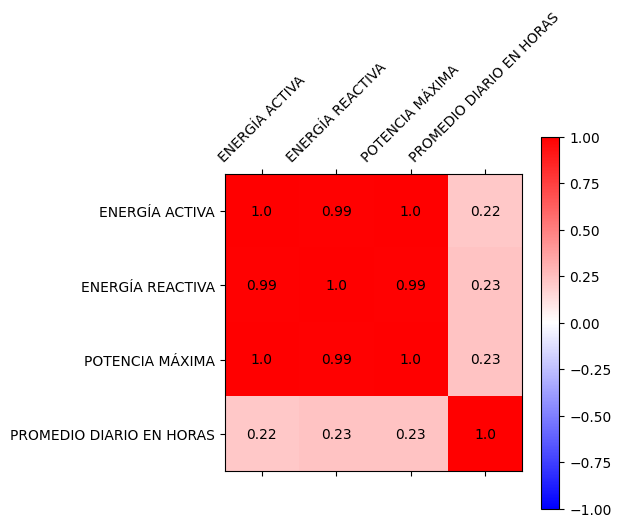

In [104]:
import pandas as pd
import matplotlib.pyplot as plt  

df_datos = pd.read_csv("../data/datosProyecto.csv")

df_datos = df_datos.drop([
    "DEPARTAMENTO", "MUNICIPIO", "LOCALIDAD", "DÍA DE DEMANDA MÁXIMA",
    "FECHA DE DEMANDA MÁXIMA", "ID DEPATAMENTO", "ID MUNICIPIO",
    "ID LOCALIDAD", "AÑO SERVICIO", "MES SERVICIO"
], axis=1)

matrizprueba = df_datos.corr()
print(matrizprueba)

plt.matshow(matrizprueba, cmap='bwr', vmin=-1, vmax=1)
plt.xticks(range(len(df_datos.columns)), df_datos.columns, rotation=45)
plt.yticks(range(len(df_datos.columns)), df_datos.columns)

for i in range(len(matrizprueba.columns)):
    for j in range(len(matrizprueba.columns)):
        plt.text(i, j, round(matrizprueba.iloc[i, j], 2), ha='center', va='center')

plt.colorbar()
plt.show()


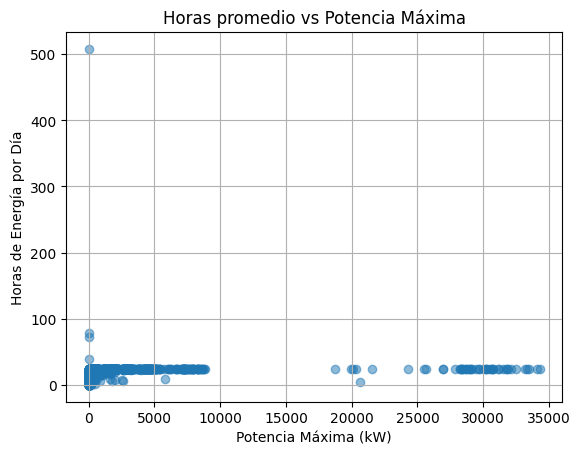

In [105]:
#Gráfico de dispersión (regresión visual)

plt.scatter(df_datos['POTENCIA MÁXIMA'], df_datos['PROMEDIO DIARIO EN HORAS'], alpha=0.5)
plt.title('Horas promedio vs Potencia Máxima')
plt.xlabel('Potencia Máxima (kW)')
plt.ylabel('Horas de Energía por Día')
plt.grid(True)
plt.show()

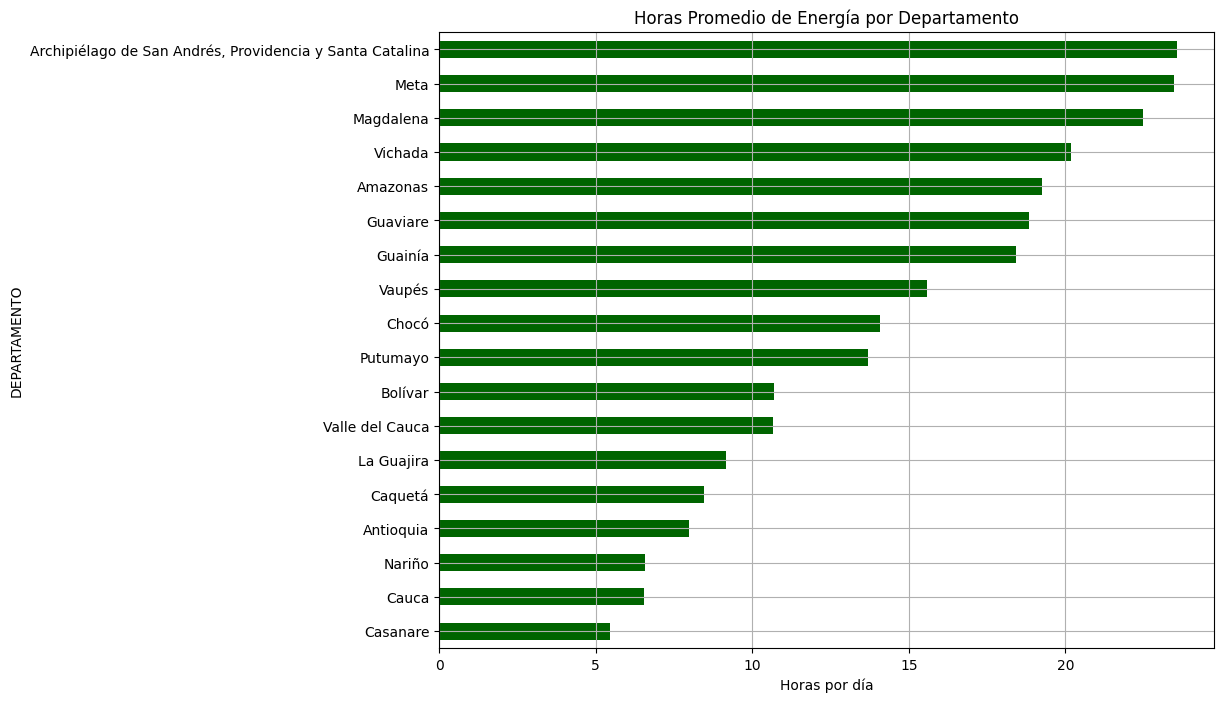

In [109]:
# Gráfico de barras por departamento

df_datos.groupby('DEPARTAMENTO')['PROMEDIO DIARIO EN HORAS'].mean().sort_values().plot(
    kind='barh', figsize=(10, 8), color='darkgreen')
plt.title('Horas Promedio de Energía por Departamento')
plt.xlabel('Horas por día')
plt.grid(True)
plt.show()


# MODELO PREDICTIVO 

📊 Evaluación del Modelo de Regresión Lineal:
MAE (Error Absoluto Medio): 5.87 horas
RMSE (Raíz del Error Cuadrático Medio): 14.87 horas
R² (Coeficiente de Determinación): 0.04


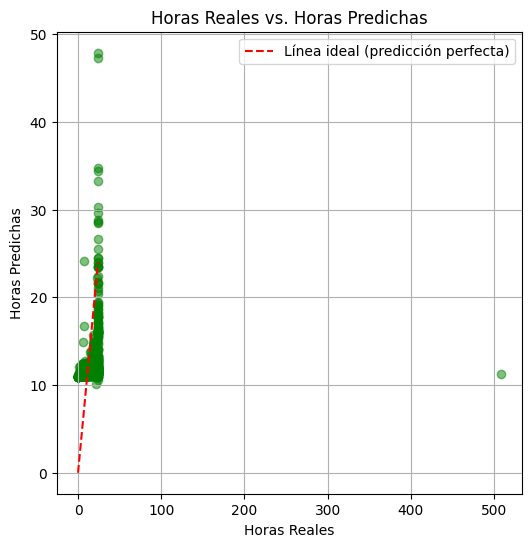

In [130]:
# MODELO DE REGRESION LINEAL 

from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

#  1. Separar datos en entrenamiento y prueba

# Variables predictoras (X) y objeto (y)

X = df_datos[['ENERGÍA ACTIVA', 'ENERGÍA REACTIVA', 'POTENCIA MÁXIMA']]
y = df_datos['PROMEDIO DIARIO EN HORAS']

# División de los datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  2. Entrenar modelo de regresión lineal

from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)


 # 3. Evaluar métricas: MAE, RMSE, R²



# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación de métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
r2 = r2_score(y_test, y_pred)

print("📊 Evaluación del Modelo de Regresión Lineal:")
print(f"MAE (Error Absoluto Medio): {mae:.2f} horas")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f} horas")
print(f"R² (Coeficiente de Determinación): {r2:.2f}")



plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([0, 24], [0, 24], color='red', linestyle='--', label='Línea ideal (predicción perfecta)')
plt.title("Horas Reales vs. Horas Predichas")
plt.xlabel("Horas Reales")
plt.ylabel("Horas Predichas")
plt.legend()
plt.grid(True)
plt.show()


In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Variables predictoras y objetivo
X = df_datos[['ENERGÍA ACTIVA', 'ENERGÍA REACTIVA', 'POTENCIA MÁXIMA']]
y = df_datos['PROMEDIO DIARIO EN HORAS']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Métricas
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Resultados
print("📊 Evaluación del Modelo Random Forest:")
print(f"MAE: {mae_rf:.2f} horas")
print(f"RMSE: {rmse_rf:.2f} horas")
print(f"R²: {r2_rf:.2f}")

📊 Evaluación del Modelo Random Forest:
MAE: 1.37 horas
RMSE: 16.67 horas
R²: 0.13


📊 Evaluación del Modelo Árbol de Decisión:
MAE: 1.43 horas
RMSE: 13.88 horas
R²: 0.16


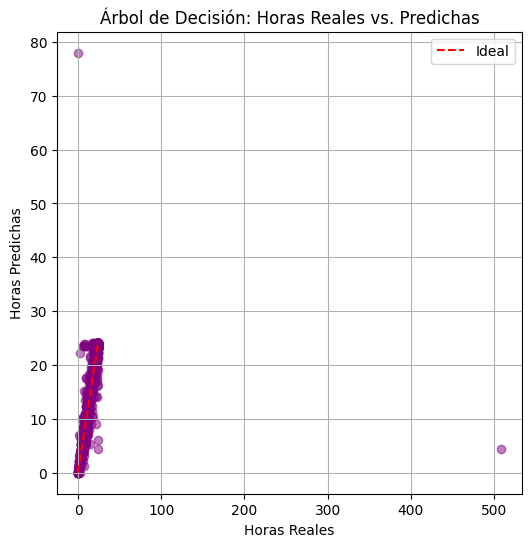

In [133]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Selección de variables
X = df_datos[['ENERGÍA ACTIVA', 'ENERGÍA REACTIVA', 'POTENCIA MÁXIMA']]
y = df_datos['PROMEDIO DIARIO EN HORAS']

# Separación de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el árbol
modelo_tree = DecisionTreeRegressor(random_state=42, max_depth=15)  # puedes ajustar max_depth
modelo_tree.fit(X_train, y_train)

# Predicciones
y_pred_tree = modelo_tree.predict(X_test)

# Métricas
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

print("📊 Evaluación del Modelo Árbol de Decisión:")
print(f"MAE: {mae_tree:.2f} horas")
print(f"RMSE: {rmse_tree:.2f} horas")
print(f"R²: {r2_tree:.2f}")

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_tree, alpha=0.5, color='purple')
plt.plot([0, 24], [0, 24], color='red', linestyle='--', label='Ideal')
plt.title("Árbol de Decisión: Horas Reales vs. Predichas")
plt.xlabel("Horas Reales")
plt.ylabel("Horas Predichas")
plt.legend()
plt.grid(True)
plt.show()


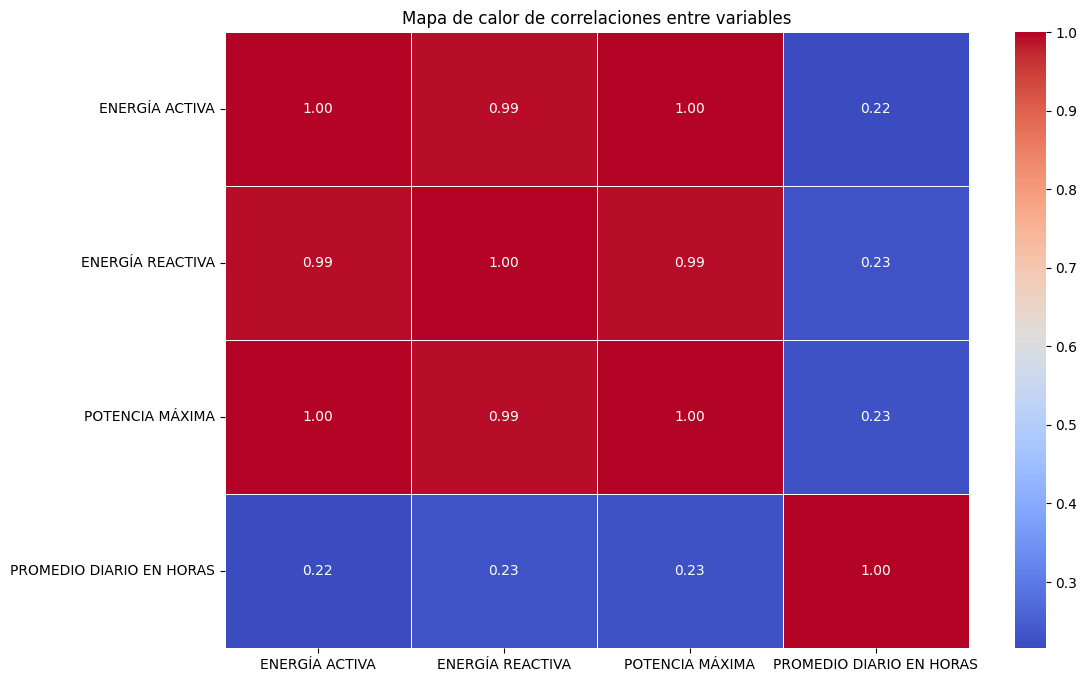

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calcular la matriz de correlación
correlation_matrix = df_datos.corr(numeric_only=True)

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones entre variables")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Selección de variables 
X = df_datos[['ENERGÍA ACTIVA', 'ENERGÍA REACTIVA', 'POTENCIA MÁXIMA']]

y = df_datos['PROMEDIO DIARIO EN HORAS']

# 2. División en entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenamiento del modelo 
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# --- 4. Predicción ---
y_pred = modelo.predict(X_test)

#  5. Evaluación del modelo 
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Evaluación del Modelo de Regresión Lineal:")
print(f"MAE: {mae:.2f} horas")
print(f"RMSE: {rmse:.2f} horas")
print(f"R²: {r2:.2f}")


📊 Evaluación del Modelo de Regresión Lineal:
MAE: 6.06 horas
RMSE: 17.62 horas
R²: 0.03


In [ ]:
# Crear una nueva columna binaria: 1 = acceso suficiente (≥12h), 0 = deficiente (<12h)
df_datos['SERVICIO_SUFICIENTE'] = (df_datos['PROMEDIO DIARIO EN HORAS'] >= 12).astype(int)

# Verificar distribución de clases
print(df_datos['SERVICIO_SUFICIENTE'].value_counts())

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Variables predictoras (X) y variable objetivo (y)
X = df_datos[['ENERGÍA ACTIVA', 'ENERGÍA REACTIVA', 'POTENCIA MÁXIMA']]
y = df_datos['SERVICIO_SUFICIENTE']

# Separación de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión logística
modelo_log = LogisticRegression(max_iter=1000 , class_weight='balanced')
modelo_log.fit(X_train, y_train)

# Predicciones
y_pred_log = modelo_log.predict(X_test)

# Métricas de evaluación
print("📊 Evaluación del Modelo Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_log))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_log))




SERVICIO_SUFICIENTE
0    2899
1    1692
Name: count, dtype: int64
📊 Evaluación del Modelo Logistic Regression:
Accuracy: 0.8705114254624592

Matriz de Confusión:
 [[597   3]
 [116 203]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       600
           1       0.99      0.64      0.77       319

    accuracy                           0.87       919
   macro avg       0.91      0.82      0.84       919
weighted avg       0.89      0.87      0.86       919



Distribución de clases (0 = deficiente, 1 = suficiente):
SERVICIO_SUFICIENTE
0    2899
1    1692
Name: count, dtype: int64

📊 Evaluación del Modelo Logistic Regression:
Accuracy: 0.8868

Matriz de Confusión:
 [[595   5]
 [ 99 220]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       600
           1       0.98      0.69      0.81       319

    accuracy                           0.89       919
   macro avg       0.92      0.84      0.86       919
weighted avg       0.90      0.89      0.88       919



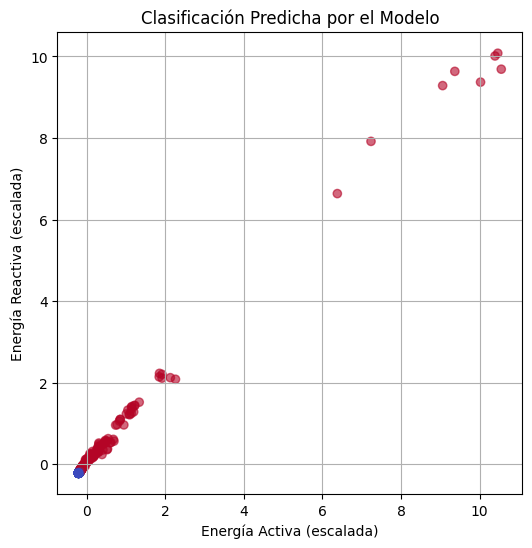

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



#  PASO 0: Crear variable de clasificación 

# 1 = servicio suficiente (≥12h), 0 = deficiente (<12h)
df_datos['SERVICIO_SUFICIENTE'] = (df_datos['PROMEDIO DIARIO EN HORAS'] >= 12).astype(int)

# Opcional: ver distribución
print("Distribución de clases (0 = deficiente, 1 = suficiente):")
print(df_datos['SERVICIO_SUFICIENTE'].value_counts())

#  PASO 1: Preparar datos 

# Variables predictoras
X = df_datos[['ENERGÍA ACTIVA', 'ENERGÍA REACTIVA', 'POTENCIA MÁXIMA']]
y = df_datos['SERVICIO_SUFICIENTE']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# PASO 2: Entrenar modelo de clasificación 
modelo_log = LogisticRegression(max_iter=1000, class_weight='balanced')  # Mejora balance de clases
modelo_log.fit(X_train, y_train)

# PASO 3: Predicción y evaluación 
y_pred_log = modelo_log.predict(X_test)

# Métricas
print("\n📊 Evaluación del Modelo Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_log))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_log))

# PASO 4: Visualización 
plt.figure(figsize=(6,6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_log, cmap='coolwarm', alpha=0.6)
plt.title("Clasificación Predicha por el Modelo")
plt.xlabel("Energía Activa (escalada)")
plt.ylabel("Energía Reactiva (escalada)")
plt.grid(True)
plt.show()
